## Grating efficiencies

This short write-up collects a few different ways to visualize the grating efficiencies that Ralf
has provided for my simulations.
Looking at those plots helps to understand which area of the Rowland circle shold be covered with detectors
and which of them receive hardly any photons anyway.

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import astropy.units as u
from cycler import cycler
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'lime']) *
cycler('linestyle', ['-', '--', ':'])))


In [3]:
import arcus.arcus as arcus

INFO:root:Reading configuration data from ['/nfs/cxc/h2/guenther/.astropy/config/arcus.cfg']
INFO:root:data files in /melkor/d1/guenther/projects/ARCUS/caldb-inputdata: version hash: 7a32fdd - commited on 2017-06-08 17:13:30 -0400

INFO:root:Loading data from spos/petallayout
INFO:root:Loading data from spos/geometricthroughput
INFO:root:Loading data from spos/reflectivity_simple
INFO:root:Loading data from other/pointingjitter
INFO:root:Loading data from gratings/efficiency
INFO:root:Loading data from gratings/debyewaller
INFO:root:Loading data from gratings/debyewaller
INFO:root:Loading data from filters/sifilter
INFO:root:Loading data from filters/opticalblocking
INFO:root:Loading data from filters/uvblocking
INFO:root:Loading data from detectors/contam
INFO:root:Loading data from detectors/qe


In [4]:
# Make wavelength grid for plots
wave = np.arange(8., 50., 0.5) * u.Angstrom
energies = wave.to(u.keV, equivalencies=u.spectral()).value

In [13]:
d = 2e-4 * u.mm

def plot_wave_orders(ax, blazeang, x='wave'):
    orders, inter = arcus.order_selector.probabilities(energies, None, np.deg2rad(blazeang))
    for n in range(1, 12):
        if x == 'wave':
            ax.plot(wave, inter[n, :], label=n)
        elif x == 'angle':
            ax.plot(np.arcsin(n * wave / d), inter[n, :], label=n)
        elif x == 'mlambda':
            ax.plot(wave * np.abs(orders[n]), inter[n, :], label=n)
    if x == 'wave':
        ax.set_xlabel('wavelength [$\AA{}$]')
    elif x == 'angle':
        ax.set_xlabel('grating angle [rad]')
    elif x == 'mlambda':
        ax.set_xlabel(' m * $\lambda$ [$\AA{}$]')
    ax.set_ylabel('grating efficiency')
    ax.legend()

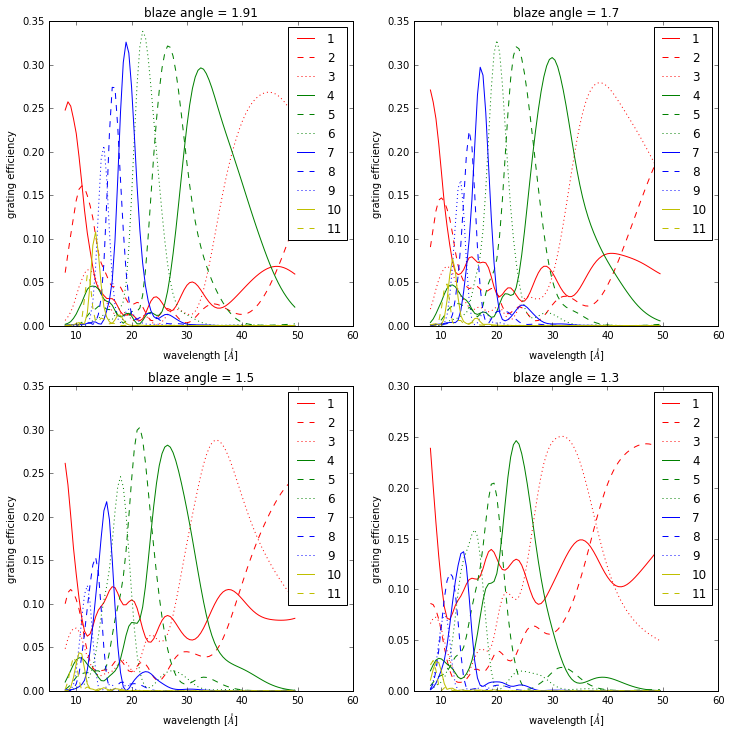

In [6]:
fig = plt.figure(figsize=(12, 12))
for i, blazeang in enumerate([1.91, 1.7, 1.5, 1.3]):
    ax = fig.add_subplot(2,2,i+1)
    plot_wave_orders(ax, blazeang, 'wave')
    ax.set_xlim([None, 60])
    ax.set_title('blaze angle = {0}'.format(blazeang))


### Second peak far below blaze peak
**Question**: Order 4 has peak at  at 33 Ang. Why is there a second peak about 12 Ang?
Order 3 has blaze peak that 45 Ang. Why is there a second peak at 12 Ang?
Order 2 has peak apparently > 50 Ang (off the plot). Why is there a second large peak around 12 Ang?

**Answer from Ralf**
At these short wavelengths the attenuation length in Si becomes comparable to or greater than the depth of the grating (4 micron), i.e. the grating becomes partially transparent, or in other words, partially transmits through the silicon bars.  This turns the grating into more of a phase-shifting grating, similar to the HETG with Au bars at higher energies.  Or like a glass grating for visible light.  It's a gradual change as you go towards shorter wavelengths, and so there are regions where 3rd and 4th order are strong, just as 1st order peaks at a certain energy for HETG.

Hope this helps.

Ralf


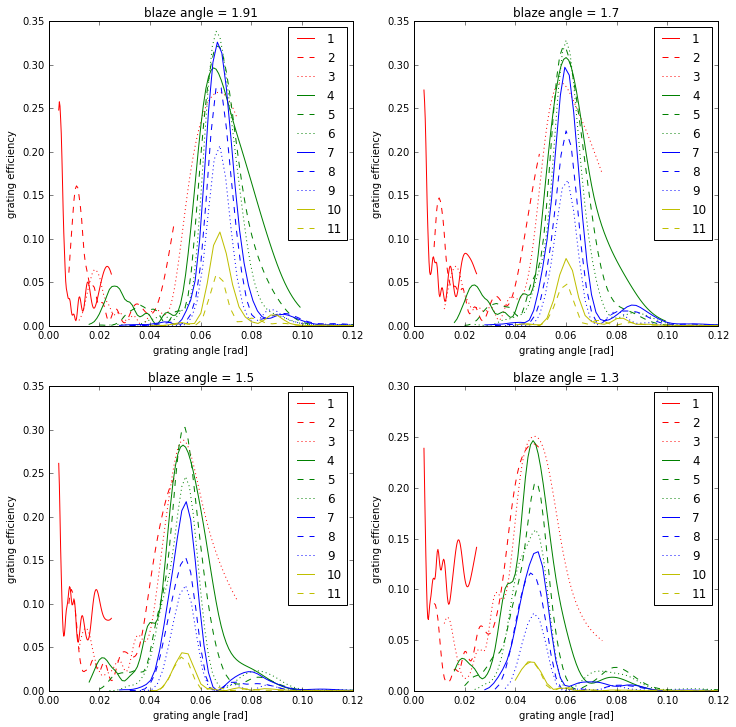

In [7]:
fig = plt.figure(figsize=(12, 12))
for i, blazeang in enumerate([1.91, 1.7, 1.5, 1.3]):
    ax = fig.add_subplot(2,2,i+1)
    plot_wave_orders(ax, blazeang, 'angle')
    ax.set_title('blaze angle = {0}'.format(blazeang))
    ax.set_xlim([0, 0.12])

The blaze peak is around 0.07 rad. Obviously this is the region that should be covered with CCDs to obtain
the best possible effective area.

However, for the low orders, most of the effictive area is actually not at the blaze peak, but at much smaller angles close to the zeroth order. If we want to go to low wavelength (high energies) then we have to record that signal, too.

In [8]:
np.rad2deg(0.07)

4.0107045659157627

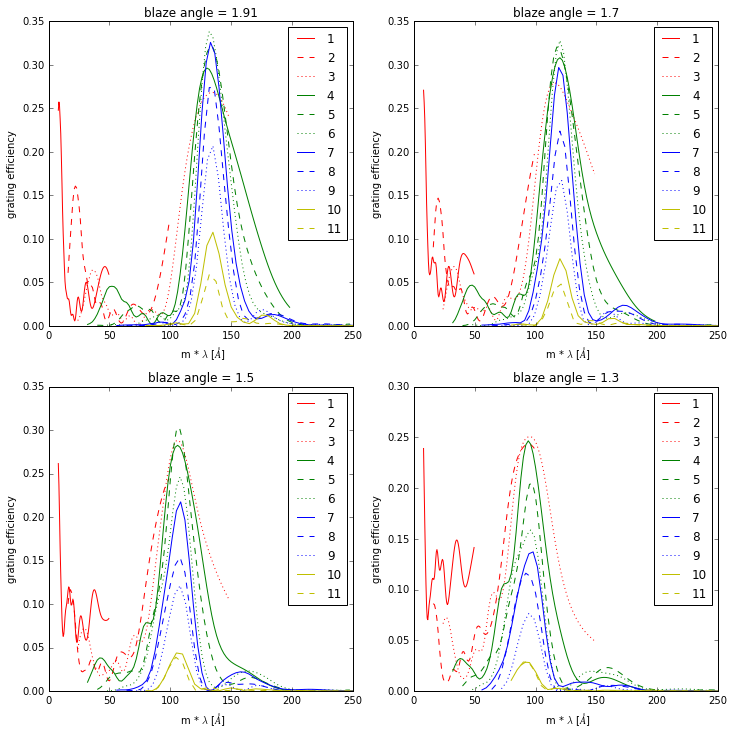

In [15]:
fig = plt.figure(figsize=(12, 12))
for i, blazeang in enumerate([1.91, 1.7, 1.5, 1.3]):
    ax = fig.add_subplot(2,2,i+1)
    plot_wave_orders(ax, blazeang, 'mlambda')
    ax.set_title('blaze angle = {0}'.format(blazeang))
    ax.set_xlim([0, 250])

(0, 250)

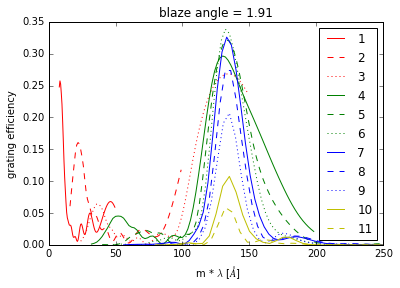

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_wave_orders(ax, 1.91, 'mlambda')
ax.set_title('blaze angle = {0}'.format(1.91))
ax.set_xlim([0, 250])